<a href="https://colab.research.google.com/github/marcelcerri/crescimentomicrobiano/blob/master/Algoritmo_Gen%C3%A9tico_em_Batelada_e_Semicont%C3%ADnuo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Monod - Simulação e Modelagem

Utilizando a função *odeint()* é possível a integração numérica da variação da concentração celular e de substrado a partir dos valores estipulados das variáveis do modelo:
 **μ_max; y_xs; ks; kd** 

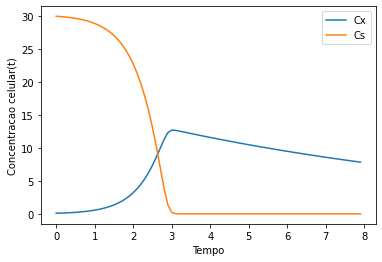

In [ ]:
from scipy.integrate import odeint
from numpy import arange
import matplotlib.pyplot as plt
import numpy as np

#Função para retornar dCx/dt
def Concentracao(state,t):
    Cx,Cs=state
    um = 2
    y = 0.456
    ks= 2.5
    kd= 0.1
    dCxdt= (((um*Cs)/(ks+Cs))-kd)*Cx
    dCsdt= -(1/y)*((um*Cs)/(ks+Cs))*Cx
    return [dCxdt,dCsdt]

init_state=[0.1,30] #Colocar valores de início para o Cx e Cs
t=arange(0,8,0.1) #Variação do tempo;
state = odeint(Concentracao, init_state, t) 

#Plotar resultados
plt.plot(t,state[:,0],label='Cx')
plt.plot(t,state[:,1],label='Cs')
plt.xlabel('Tempo')
plt.ylabel('Concentracao celular(t)')
plt.legend()
plt.show()

###  Batelada

Pode-se então, importar dados de concentração celular e de substrato obtidos de cultivos como os valores experimentais : **Cx_exp** e **Cs_exp**

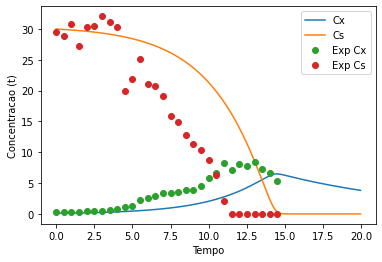

In [ ]:
from scipy.integrate import odeint
from numpy import arange
import matplotlib.pyplot as plt
import numpy as np

#Função para retornar dCx/dt
def Concentracao(state,t):
    Cx,Cs=state
    um = 0.42
    y = 0.3
    ks= 1.2
    kd= 0.1
    dCxdt= (((um*Cs)/(ks+Cs))-kd)*Cx
    dCsdt= -(1/y)*((um*Cs)/(ks+Cs))*Cx
    return [dCxdt,dCsdt]


init_state=[0.1,30] #Colocar valores de início para o Cx e Cs
t=arange(0,20,0.05) #Variação do tempo;
state = odeint(Concentracao, init_state, t)

Cx_exp=np.array([0.247,0.235,0.295,0.328,0.426,0.483,0.547,0.618,0.794,1.185,1.254,2.328,2.580,2.890,3.375,3.350,3.510,3.890,3.87,4.6,5.8,6.7,8.3,7.2,8.1,7.8,8.4,7.3,6.6,5.3]) #Valores de tempo e Cx
Cs_exp=np.array([29.58,28.86,30.82,27.31,30.3604,30.512,32.07,31.09,30.3817,19.9537,21.88,25.1167,21.01,20.81,19.0656,15.93,14.96,12.82,11.36,10.3,8.7,6.3,2.1,0,0,0,0,0,0,0]) #Valores de tempo e Cs
texp=arange(0,15,0.5) #Variação do tempo experimental

#Plotar resultados
plt.plot(t,state[:,0],label='Cx')
plt.plot(t,state[:,1],label='Cs')
plt.plot(texp,Cx_exp,"o", label='Exp Cx')
plt.plot(texp,Cs_exp,"o", label='Exp Cs')
plt.xlabel('Tempo')
plt.ylabel('Concentracao (t)')
plt.legend()
plt.show()


No entanto, observa-se que cada cultivo terá uma cinética distinta que é uma combinação de diversos fatores indicados pelas variáveis do modelo

Assim, Ferramentas de ajuste e minimização de erros podem ser utilizadas para ajustar os valores das variáveis do modelo. Uma delas é o algoritmo genético, utilizado a seguir a partir da função *differential_evolution()*

umax = 0.30
yxs = 0.26
ks = 3.00
kd = 0.03
Cx inicial = 0.60
Cs inicial = 30.82
--------------------


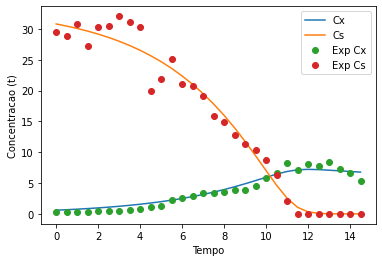

In [ ]:
from scipy.integrate import odeint
from numpy import arange
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import differential_evolution

Cx_exp=np.array([0.247,0.235,0.295,0.328,0.426,0.483,0.547,0.618,0.794,1.185,1.254,2.328,2.580,2.890,3.375,3.350,3.510,3.890,3.87,4.6,5.8,6.7,8.3,7.2,8.1,7.8,8.4,7.3,6.6,5.3]) #Valores de tempo e Cx
Cs_exp=np.array([29.58,28.86,30.82,27.31,30.3604,30.512,32.07,31.09,30.3817,19.9537,21.88,25.1167,21.01,20.81,19.0656,15.93,14.96,12.82,11.36,10.3,8.7,6.3,2.1,0,0,0,0,0,0,0]) #Valores de tempo e Cs
texp=arange(0,15,0.5) #Variação do tempo experimental
t=arange(0,15,0.5) #Variação do tempo;
#w[0] um
#w[1] yxs
#w[2] ks
#w[3] kd
#w[4] Cx
#w[5] Cs

#Função para retornar dCx/dt
def Concentracao(state, t, k):
    um = k[0]
    yxs = k[1]
    ks = k[2]
    kd = k[3]
    Cx, Cs = state
    dCxdt= (((um*Cs)/(ks+Cs))-kd)*Cx
    dCsdt= -(1/yxs)*((um*Cs)/(ks+Cs))*Cx
    return [dCxdt, dCsdt]

def Integração(w):
    global C_sim
    init_state=[w[4],w[5]] #Colocar valores de início para o Cx e Cs
    k = [w[0], w[1], w[2], w[3]]
    C_sim = odeint(Concentracao, init_state, t, args = (k,))
    residuoCx = np.sqrt(sum((Cx_exp - C_sim[:,0])**2)/len(Cx_exp))
    residuoCs = np.sqrt(sum((Cs_exp - C_sim[:,1])**2)/len(Cs_exp))
    residuoC = np.sqrt(residuoCx**2 + residuoCs**2)
    return residuoC

resultado = differential_evolution(Integração, bounds = [(0,0.6), (0,0.6), (0,3), (0,3), (0,2), (20,50)], maxiter=1000, popsize=25)

print('umax = %.2f' %resultado.x[0]) 
print('yxs = %.2f' %resultado.x[1]) 
print('ks = %.2f' %resultado.x[2])
print('kd = %.2f' %resultado.x[3])
print('Cx inicial = %.2f' %resultado.x[4])
print('Cs inicial = %.2f' %resultado.x[5])
print('-'*20)

#Plotar resultados
plt.plot(t,C_sim[:,0],label='Cx')
plt.plot(t,C_sim[:,1],label='Cs')
plt.plot(texp,Cx_exp,"o", label='Exp Cx')
plt.plot(texp,Cs_exp,"o", label='Exp Cs')
plt.xlabel('Tempo')
plt.ylabel('Concentracao (t)')
plt.legend()
plt.show()


### Balelada Alimentada

Da mesma maneira, na batelada alimentada, a variação da concentração é integrada

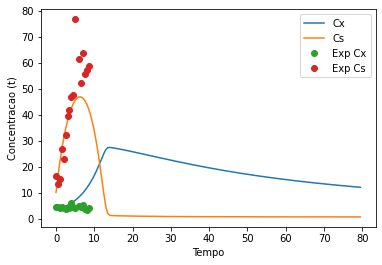

In [ ]:
from scipy.integrate import odeint
from numpy import arange
import matplotlib.pyplot as plt
import numpy as np

#Função para retornar dCx/dt
def Concentracao(state,t):
    Cx, Cs = state
    umax = 0.3
    Ks= 3
    yxs= 0.322862263410841
    kd = 0.05
    Q = 0.2
    V0=2.0
    D=Q/(V0+Q*t)
    Csi = 169.63680561761663
    dCx_dt = ((((umax*Cs)/(Ks+Cs))-kd)-D)*Cx
    dCs_dt = (-(1/yxs)*(umax*Cs)/(Ks+Cs))*Cx + (D*(Csi - Cs))
    return [dCx_dt, dCs_dt]

init_state = [3.474067087310976,10.076434571773264]
t= arange(0,80,0.5)
state=odeint(Concentracao, init_state, t)

x=np.array([4.5, 4.35, 4.04, 4.44, 3.96, 3.735, 4.09, 4.23, 5.95, 4.41, 4.17, 4.735, 4.47, 5.075, 3.66, 3.425, 4.025]) #Valores de tempo e Cx
s=np.array([16.51, 13.43, 15.36, 26.8, 22.82, 32.25, 39.59, 41.964, 46.895, 47.739, 76.739, 61.397, 52.119, 63.9, 55.688, 57.327, 58.798]) #Valores de tempo e Cs
texp=np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,6,6.5,7,7.5, 8, 8.5]) #Variação do tempo experimental

#Plotar resultados
plt.plot(t,state[:,0],label='Cx')
plt.plot(t,state[:,1],label='Cs')
plt.plot(texp,x,"o", label='Exp Cx')
plt.plot(texp,s,"o", label='Exp Cs')
plt.xlabel('Tempo')
plt.ylabel('Concentracao (t)')
plt.legend()
plt.show()

Utilizando o algoritmo genético, ajusta-se o modelo aos dados experimentais 
(Variação do volume do reator no eixo secundário)

umax = 0.50
yxs = 0.45
ks = 4.63
kd = 0.30
Cx = 3.79
Cs = 8.25
Cs_i = 184.31
--------------------


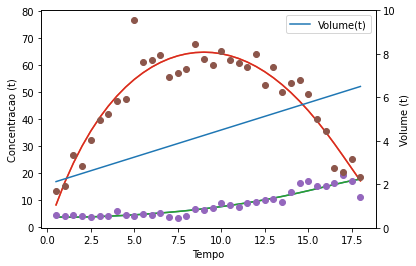

In [ ]:
from scipy.integrate import odeint
from numpy import arange
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import differential_evolution

#Conjunto de Dados
importado = pd.read_excel("Dados_Batelada_Alimentada.xlsx")
importado_np = importado.values
Cx_exp = importado_np[:,1]
Cs_exp = importado_np[:,2]
texp = importado_np[:,0]

t=texp #Variação do tempo;

#w[0] um
#w[1] yxs
#w[2] ks
#w[3] kd
#w[4] Cx
#w[5] Cs
#w[6] Csi

Q=0.25
V0 = 2.0

#Função para retornar dCx/dt
def Concentracao(state, t, k):
    umax = k[0]
    yxs = k[1]
    ks = k[2]
    kd = k[3]
    Q = 0.25
    V0 = 2
    Csi = k[4]
    Cx, Cs = state
    D=Q/(V0+Q*t)
    dCx_dt = ((((umax*Cs)/(ks+Cs))-kd)-D)*Cx
    dCs_dt = (-(1/yxs)*(umax*Cs)/(ks+Cs))*Cx + (D*(Csi - Cs))
    return [dCx_dt, dCs_dt]

def Integração(w):
    global C_sim
    init_state=[w[4],w[5]] #Colocar valores de início para o Cx e Cs
    k = [w[0], w[1], w[2], w[3], w[6]]
    C_sim = odeint(Concentracao, init_state, t, args = (k,))
    residuoCx = np.sqrt(sum((Cx_exp - C_sim[:,0])**2)/len(Cx_exp))
    residuoCs = np.sqrt(sum((Cs_exp - C_sim[:,1])**2)/len(Cs_exp))
    residuoC = np.sqrt(residuoCx**2 + residuoCs**2)
    return residuoC

resultado = differential_evolution(Integração, bounds = [(0.01,0.5), (0,0.6), (0,10), (0,1), (0,10), (5,20), (75,300)], maxiter=2000, popsize=35)
parametros = resultado.x

V0 = 2.0
Volume = V0+Q*t

print('umax = %.2f' %resultado.x[0]) 
print('yxs = %.2f' %resultado.x[1])
print('ks = %.2f' %resultado.x[2])
print('kd = %.2f' %resultado.x[3])
print('Cx = %.2f' %resultado.x[4])
print('Cs = %.2f' %resultado.x[5])
print('Cs_i = %.2f' %resultado.x[6])
print('-'*20)

#Plotar resultados
fig, ax1 = plt.subplots()

ax1.plot(t,C_sim,label='Cx')
ax1.plot(t,C_sim,label='Cs')
ax1.plot(texp,Cx_exp,"o", label='Exp Cx')
ax1.plot(texp,Cs_exp,"o", label='Exp Cs')
ax1.set_ylabel('Concentracao (t)')
ax2 = ax1.twinx()
ax2.plot(t,Volume,label='Volume(t)')
ax2.set_ylabel('Volume (t)')
ax2.set_ylim([0, 10])
ax1.set_xlabel('Tempo')
plt.legend()
plt.show()